In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [3]:
data = tf.keras.datasets.fashion_mnist
data

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/Users/zainulmustafa/Workspace/uni/tme6015/FashionMnist/dvenv/lib/python3.11/site-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [4]:
dataset = data.load_data()

In [44]:
trainSet, testSet = dataset
xTrain, yTrain = trainSet
xTest, yTest = testSet

xTrain, xTest = xTrain / 255.0, xTest / 255.0

labels = ["t_shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle_boot"]

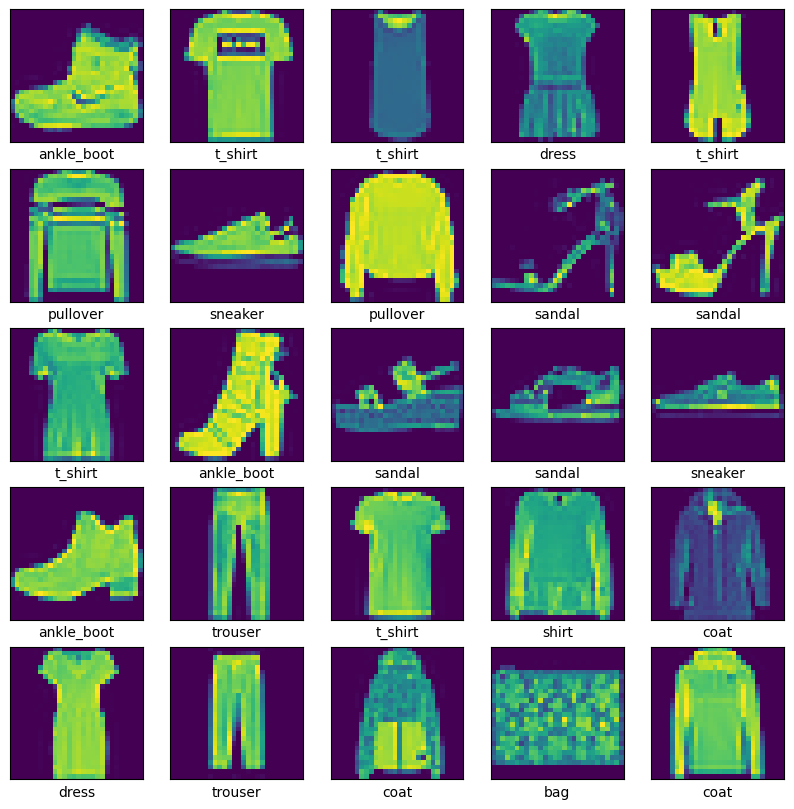

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xTrain[i])
    plt.xlabel(labels[yTrain[i]])
plt.show()

In [48]:
imageShape = xTrain[0].shape
imageWidth, imageHeight = imageShape

In [75]:
batchSize = 32
nbEpoch = 35
imgChannels = 1 #grayscale
nbFilters = 32
nbPool = 2
nbConv = 5

In [76]:
model = models.Sequential()
model.add(layers.Conv2D(nbFilters, (3, 3), activation='relu', input_shape=(imageWidth, imageHeight, imgChannels)))
model.add(layers.MaxPooling2D((nbPool, nbPool)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((nbPool, nbPool)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(labels)))

print(model.summary())
print(model.get_config())
print(model.layers[0].get_config())
print(model.layers[0].input_shape)           
print(model.layers[0].output_shape)      
print(model.layers[0].get_weights())
np.shape(model.layers[0].get_weights()[0])
print(model.layers[0].trainable)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(xTrain, yTrain, verbose=1, batch_size=batchSize, epochs=nbEpoch, validation_data=(xTest, yTest))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_16 (Flatten)        (None, 576)             

In [66]:
score = model.evaluate(xTest, yTest, verbose=0)
print(score)

[0.29130229353904724, 0.9111999869346619]


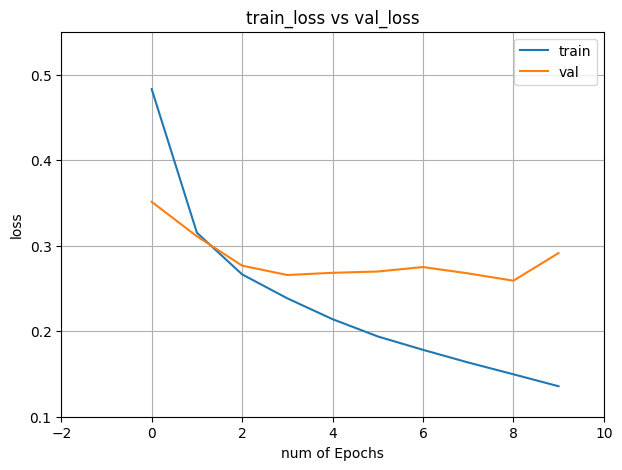

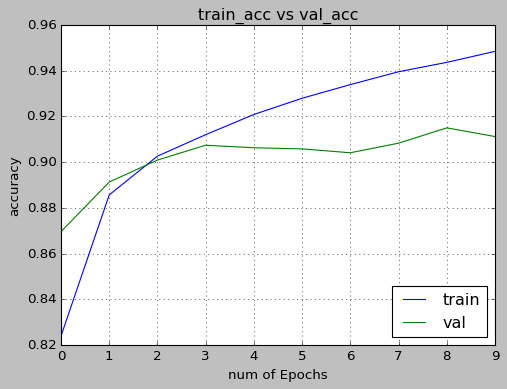

In [74]:
trainLoss = history.history['loss']
valLoss = history.history['val_loss']
trainAcc = history.history['accuracy']
valAcc = history.history['val_accuracy']
xc = range(nbEpoch)

plt.figure(1, figsize=(7,5))
plt.plot(xc, trainLoss)
plt.plot(xc, valLoss)
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

plt.figure(2, figsize=(7,5))
plt.plot(xc, trainAcc)
plt.plot(xc, valAcc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'], loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()